# NOTE:
    All these Preprocessing methods are not suitable for all type of projects. It differs from project to project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Twitter 16B.csv', encoding = 'latin1', header=None)

In [3]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df = df[[5,0]]

In [5]:
df.columns = ['twitts', 'sentiment']
df

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [6]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
sent_map = {0: 'negative', 4: 'positive'}

# Word counts

In [8]:
df['word_counts'] = df['twitts'].apply(lambda x : len(str(x).split()))

<ipython-input-8-5dde9ed1c673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_counts'] = df['twitts'].apply(lambda x : len(str(x).split()))


In [9]:
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


# Characters counts

In [10]:
df['char_counts'] = df['twitts'].apply(lambda x : len(x))
df.head()

<ipython-input-10-ae9b18250f46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_counts'] = df['twitts'].apply(lambda x : len(x))


,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


# stop words

In [11]:
import spacy
from spacy.lang.en import STOP_WORDS

In [12]:
print(STOP_WORDS)

{'all', 'thru', 'fifteen', 'once', 'does', "'s", 'done', 'has', 'your', 'twenty', 'n‘t', 'must', 'ours', 'before', 'former', 'toward', 'back', 'say', 'six', 'yours', 'two', 'various', 'no', 'n’t', 'am', 'formerly', 'towards', 'these', 'anyway', 'already', 'herein', 'him', 'well', 'in', '‘m', 're', 'except', 'mostly', 'become', 'through', 'throughout', 'their', 'hereafter', 'being', 'anywhere', 'afterwards', 'behind', 'hereby', 'see', 'whereas', "'re", 'seems', 'she', 'most', 'both', 'i', 'of', 'therefore', 'where', 'his', 'nine', 'from', 'our', "'m", 'is', 'upon', 'without', 'until', 'beforehand', 'after', 'several', 'often', 'between', 'everywhere', '‘ll', 'me', 'take', 'down', 'if', 'yourself', 'among', 'top', 'had', 'always', 'perhaps', 'rather', 'across', 'whence', 'forty', 'therein', 'few', 'as', 'how', 'due', 'alone', '’re', 'whole', 'front', '’d', 'nor', 'its', 'whereby', 'enough', 'whenever', 'would', 'empty', 'themselves', 'us', 'part', 'sometime', 'he', 'thus', 'to', 'we', '‘

In [13]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

<ipython-input-13-e88873368cf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))


In [14]:
df.head()

,twitts,sentiment,word_counts,char_counts,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,4
1,is upset that he can't update his Facebook by ...,0,21,111,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,7
3,my whole body feels itchy and like its on fire,0,10,47,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,10


# Preprocessing and Data cleaning

### Lower case conversion

In [15]:
df['twitts'] = df['twitts'].apply(lambda x : x.lower())
df.head()

<ipython-input-15-5dd74276dfcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x : x.lower())


,twitts,sentiment,word_counts,char_counts,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,4
1,is upset that he can't update his facebook by ...,0,21,111,9
2,@kenichan i dived many times for the ball. man...,0,18,89,7
3,my whole body feels itchy and like its on fire,0,10,47,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,10


### Remove Emails

In [16]:
import re

In [17]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'([a-zA-Z0-9z+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

<ipython-input-17-4b58cb81591b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'([a-zA-Z0-9z+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))


In [18]:
df.head()

,twitts,sentiment,word_counts,char_counts,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,4
1,is upset that he can't update his facebook by ...,0,21,111,9
2,@kenichan i dived many times for the ball. man...,0,18,89,7
3,my whole body feels itchy and like its on fire,0,10,47,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,10


### Remove URL's

In [19]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

<ipython-input-19-f90a9a982119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))


In [20]:
df.head()

,twitts,sentiment,word_counts,char_counts,stop_words_len
0,"@switchfoot - awww, that's a bummer. you sho...",0,19,115,4
1,is upset that he can't update his facebook by ...,0,21,111,9
2,@kenichan i dived many times for the ball. man...,0,18,89,7
3,my whole body feels itchy and like its on fire,0,10,47,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,10


### Removing RT(ReTweets)

Mainly in social media apps like Twitters, we often have Retweets like Thanks for this video, Thank you, subscribe here, etc. These are unecesary data that has to be removed from tweets. 

In [21]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', ' ', x))

<ipython-input-21-b2c6caef7fe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', ' ', x))


In [22]:
df.head()

,twitts,sentiment,word_counts,char_counts,stop_words_len
0,"@switchfoot - awww, that's a bummer. you sho...",0,19,115,4
1,is upset that he can't update his facebook by ...,0,21,111,9
2,@kenichan i dived many times for the ball. man...,0,18,89,7
3,my whole body feels itchy and like its on fire,0,10,47,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,10


### Removing Punctuation

In [23]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^a-zA-Z0-9-]+', ' ', x))

<ipython-input-23-fcdf2333c50b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^a-zA-Z0-9-]+', ' ', x))


In [24]:
df.head()

,twitts,sentiment,word_counts,char_counts,stop_words_len
0,switchfoot - awww that s a bummer you shoulda...,0,19,115,4
1,is upset that he can t update his facebook by ...,0,21,111,9
2,kenichan i dived many times for the ball mana...,0,18,89,7
3,my whole body feels itchy and like its on fire,0,10,47,5
4,nationwideclass no it s not behaving at all i...,0,21,111,10


### Remove Multiple Spaces

In [25]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

<ipython-input-25-810577c57a2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))


In [26]:
df.head()

,twitts,sentiment,word_counts,char_counts,stop_words_len
0,switchfoot - awww that s a bummer you shoulda ...,0,19,115,4
1,is upset that he can t update his facebook by ...,0,21,111,9
2,kenichan i dived many times for the ball manag...,0,18,89,7
3,my whole body feels itchy and like its on fire,0,10,47,5
4,nationwideclass no it s not behaving at all i ...,0,21,111,10


### Remove HTML Tags

In [27]:
from bs4 import BeautifulSoup

In [28]:
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

<ipython-input-28-bc8033215048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [65]:
df.head()

,twitts,sentiment,word_counts,char_counts,stop_words_len
0,switchfoot - awww that s a bummer you shoulda ...,0,19,115,4
1,is upset that he can t update his facebook by ...,0,21,111,9
2,kenichan i dived many times for the ball manag...,0,18,89,7
3,my whole body feels itchy and like its on fire,0,10,47,5
4,nationwideclass no it s not behaving at all i ...,0,21,111,10


In [29]:
x = 'karthi <h>Heading</h> meaning'
a = lambda x: BeautifulSoup(x, 'html.parser').get_text()
a(x)

'karthi Heading meaning'

### Accented Text(kàrthêêk) removal

This is the standard way of removing accented characters.

In [30]:
import unicodedata

In [31]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [32]:
x = 'kàrthêêk'
remove_accented_chars(x)

'kartheek'

In [33]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

<ipython-input-33-c847073fe666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))


# Text cleaning using Spacy

In [34]:
import spacy
from spacy.lang.en import STOP_WORDS

### Remove Stop Words 

In [35]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([text for text in x.split() if text not in STOP_WORDS]))

<ipython-input-35-ac79ff579859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x: " ".join([text for text in x.split() if text not in STOP_WORDS]))


In [36]:
df.head()

,twitts,sentiment,word_counts,char_counts,stop_words_len
0,switchfoot - awww s bummer shoulda got david c...,0,19,115,4
1,upset t update facebook texting cry result sch...,0,21,111,9
2,kenichan dived times ball managed save 50 rest...,0,18,89,7
3,body feels itchy like fire,0,10,47,5
4,nationwideclass s behaving m mad t,0,21,111,10


### Convert into Base form or Root form

This is not suitable for a project has use cases like present, future and past..

In [37]:
nlp = spacy.load('en_core_web_sm')

x = 'kenichan dived times ball managed save 50 rest bounds'

In the above example base forms are dive = dived, time = times, manage = managed, bound = bounds....The main aspect of this is if our model has dive and dived in 2 different lines then it will be treated as the 2 different words, but the inner meaining is same for both.

In [38]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)   #nlp returns only DOC objects, so we have to make into strings.
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
            
        x_list.append(lemma)
    print(" ".join(x_list))

In [40]:
x = "this is something newest things to do him as well"
make_to_base(x)

this is something new thing to do him as well


In [41]:
#  df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

#as this takes long time so it hasn't runned in this...

### common words removal

These words are different from stop words. As these words occur frequently in a text although it has no importance in meaning.

In [43]:
" ".join(df.head()['twitts'])  #5 lines are concatenated...

'switchfoot - awww s bummer shoulda got david carr day d upset t update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass s behaving m mad t'

In [44]:
text = " ".join(df['twitts'])

In [45]:
text = text.split()

In [47]:
freq_comn = pd.Series(text).value_counts()
freq_comn

s                  189204
t                  181720
m                  138253
good                91120
day                 85012
                    ...  
chemgk                  1
masterj                 1
red-white-green         1
digitaljournal          1
lullamae                1
Length: 624986, dtype: int64

In [58]:
f20 = freq_comn[:20]
f20

s        189204
t        181720
m        138253
good      91120
day       85012
like      78357
-         72919
quot      72090
today     68039
love      64801
work      64788
going     64565
got       61278
lol       59141
time      57552
u         55831
know      51966
im        50673
don       50422
amp       48706
dtype: int64

In [59]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

<ipython-input-59-3bd7272601f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))


In [60]:
df['twitts'].head()

0          switchfoot awww bummer shoulda david carr d
1    upset update facebook texting cry result schoo...
2    kenichan dived times ball managed save 50 rest...
3                                body feels itchy fire
4                         nationwideclass behaving mad
Name: twitts, dtype: object

### Rare words Removal

In [62]:
rare20 = freq_comn[-20:]
rare20

uashauhsuahsuahushaushuahsuahs    1
grese                             1
41921                             1
sankt-moritz                      1
lejuiceman                        1
marline61                         1
metaplasmico                      1
babsdavis                         1
casks                             1
jalonchan                         1
mvinnedge                         1
probert06                         1
auto-updating                     1
spothiawala                       1
issamar14                         1
chemgk                            1
masterj                           1
red-white-green                   1
digitaljournal                    1
lullamae                          1
dtype: int64

In [65]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))

<ipython-input-65-c9e82414fb9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))


# Resizing and Saving dataset

In [95]:
df.shape

(1600000, 5)

In [104]:
df0 = df[df['sentiment'] == 0].sample(2000)
df4 = df[df['sentiment'] == 4].sample(2000)

In [105]:
dfr = df0.append(df4, ignore_index = True)
dfr.shape

(4000, 5)

In [106]:
dfr.drop(columns = ['stop_words_len', 'char_counts', 'word_counts'], inplace = True)

dfr.head()

,twitts,sentiment
0,having,0
1,sad hour away,0
2,skdev ah thats paranoia hate needles ve needle...,0
3,damn caught product searching sleep office epi,0
4,miss hug goat stupid photography wanted hug goat,0


In [107]:
dfr.tail()

,twitts,sentiment
3995,nickygeezy start necessary possible suddenly i...,4
3996,ehhh wanna goodwill sudden urges guess heading...,4
3997,accepted hospital search khaki pants,4
3998,imogenheap great voice fever ray thanks link,4
3999,naomichappell simple rules world better place ...,4


In [108]:
#saving our data
dfr.to_csv('Cleaned Twitter.csv')

# Word Cloud Visualization

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
x = " ".join(text[:20000]) #if we plot with morethan 20000 words, then our pc may hangs....
len(text)

11827972

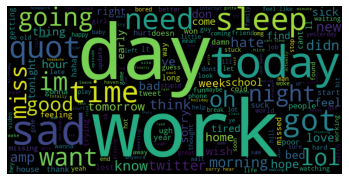

In [69]:
wc = WordCloud(width= 800, height= 400).generate(x)
plt.imshow(wc)
plt.axis('off')  #this removes the axis around it..
plt.show()

# Word Embedding

### Spacy Word2vec

In [88]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [89]:
doc = nlp('thank you! dog cat lion')

In [90]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True


In [92]:
token.vector.shape

(300,)

In [93]:
nlp('cat').vector.shape

(300,)

In [94]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token.similarity(token2))

thank thank 0.13629763
thank you 0.20392053
thank ! 0.19601384
thank dog 0.47424486
thank cat 0.5265438
thank lion 1.0
you thank 0.13629763
you you 0.20392053
you ! 0.19601384
you dog 0.47424486
you cat 0.5265438
you lion 1.0
! thank 0.13629763
! you 0.20392053
! ! 0.19601384
! dog 0.47424486
! cat 0.5265438
! lion 1.0
dog thank 0.13629763
dog you 0.20392053
dog ! 0.19601384
dog dog 0.47424486
dog cat 0.5265438
dog lion 1.0
cat thank 0.13629763
cat you 0.20392053
cat ! 0.19601384
cat dog 0.47424486
cat cat 0.5265438
cat lion 1.0
lion thank 0.13629763
lion you 0.20392053
lion ! 0.19601384
lion dog 0.47424486
lion cat 0.5265438
lion lion 1.0
